In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

In [3]:
data1 = pd.read_table('menuitems.normalized', " [+] ", engine = 'python', header = None)

In [4]:
data2 = data1.drop(5, axis=1)
data2[4] = data2[4].astype(str)
data2 = data2.groupby([0,3])[4].apply(lambda x: ' '.join(x)).reset_index()
#data3 = data2.groupby([0,3])[4].apply(lambda x: ' '.join(x)).reset_index()

In [5]:
data1.head()

,0,1,2,3,4,5
0,Tiffin Etc.,indian,philadelphia,$$,aloo paratha mashed potatoes flavored with tan...,3.5
1,Tiffin Etc.,indian,philadelphia,$$,paneer do pyaza roll homemade cottage cheese a...,8.0
2,Tiffin Etc.,indian,philadelphia,$$,masala aloo roll pan fried spiced potatoes and...,5.5
3,Tiffin Etc.,indian,philadelphia,$$,bhuna chicken roll tender fire roasted chicken...,6.5
4,Tiffin Etc.,indian,philadelphia,$$,murg tikka roll tandoori chicken kebabs with c...,6.5


In [6]:
data3 = data2.drop(4, axis = 1)
data3.columns = ['name','price']
data3.head()

,name,price
0,#1 Chop Suey,$
1,'Inoteca,$$
2,'ino,$$
3,'sNice,$
4,"1 Fish, 2 Fish",$


In [7]:
data4 = data2.drop(3, axis=1)
data4.columns = ['name','menu']
data4.head()

,name,menu
0,#1 Chop Suey,pork noodle soup large ham small extra onion h...
1,'Inoteca,soppressata mortadella coppa speck cioccolata ...
2,'ino,egg fontina bruschetta egg fontina bruschetta ...
3,'sNice,brie pear and arugula with raspberry mustard h...
4,"1 Fish, 2 Fish",sushi sashimi combo hunan shrimp shrimp with s...


In [8]:
#data2.head()
#data2.loc[[0],[4]]
data_dict = data4 #.drop([1,2,3], axis=1)
data_dict.head()
data_dict2 = data_dict.set_index('name')['menu'].to_dict()

In [9]:
data_dict2.itervalues().next()
#data_dict2

'chilled corn soup with cilantro royale shellfish emulsion salad of heirloom tomato sheep s milk ricotta baby coconut solera vinegar carpaccio of octopus artichoke vinaigrette sardines on toast avocado black olive basil roasted maine scallops english oeas hazelnut and brown butter braised escolar fried green tomatoes minestrone broth toasted alaskan spot prawns tater tots whole roasted fish of the day galantine of guinea hen macerated peaches oven roasted bone marrow vandouvan crust foie gras candy bar macadamia cocoa butter chocolate orchid fruit braised beef rib homemade steak sauce roasted day aged strip loin of beef forestiere sauce roasted all natural chicken leg fricassee muscovy duck breast spicy duck meatballs gumbo jus pan grilled house made half smoke sausage walla walla onion condiment summer vegetable tart tomato fondue fregola sarda with cabra la mancha cheese and shelling beans wood oven roasted fingerlings with pickled radishes potato puree with fresh garlic hand cut bdt

In [10]:
v = TfidfVectorizer(stop_words = 'english')
x = v.fit_transform(data_dict2.values())

In [11]:
x.shape

(5917, 47643)

In [12]:
#http://stackoverflow.com/questions/36587702/convert-sparse-matrix-csc-matrix-to-pandas-dataframe
#Give me a dataframe with all restaurants as observations
#this is what you will use for PCA plotting
dense_df1 = pd.DataFrame(x.toarray())
#dense_df1.head()

In [13]:
dense_df1.shape

(5917, 47643)

In [14]:
#concat full TF-IDF df with pricing, create %10 CV


from sklearn import cross_validation
kmeans_df = pd.concat([dense_df1, data3], axis=1)
# kmeans_cvdf = cross_validation.StratifiedKFold(kmeans_df, 10, shuffle=True)
# kmeans_cvdf.head()
# list(kmeans_cvdf)[0]
kmeans_df.head()

/home/fcheung/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,0,1,2,3,4,5,6,7,8,9,...,47635,47636,47637,47638,47639,47640,47641,47642,name,price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,#1 Chop Suey,$
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,'Inoteca,$$
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,'ino,$$
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,'sNice,$
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"1 Fish, 2 Fish",$


In [15]:
kmeans_df2 = kmeans_df.dropna()
kmeans_df2.loc[kmeans_df2.iloc[:,-1] == '$','price'] = 1
kmeans_df2.loc[kmeans_df2.iloc[:,-1] == '$$','price'] = 2
kmeans_df2.loc[kmeans_df2.iloc[:,-1] == '$$$','price'] = 3
kmeans_df2.loc[kmeans_df2.iloc[:,-1] == '$$$$','price'] = 4
# kmeans_df2.tail()


/home/fcheung/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [16]:
#might be faster to filter and just take 10%
#take 10% sample of each sub sample and concatenate
sample_price1 = kmeans_df2.query("price == 1").sample(frac=.1)
sample_price2 = kmeans_df2.query("price == 2").sample(frac=.1)
sample_price3 = kmeans_df2.query("price == 3").sample(frac=.1)
sample_price4 = kmeans_df2.query("price == 4").sample(frac=.1)

frames = [sample_price1,sample_price2,sample_price3,sample_price4]
kmeans_sample = pd.concat(frames)
kmeans_sample2 = kmeans_sample.drop(['name','price'], axis=1)
kmeans_sample2.values



array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [17]:
from sklearn.cluster import KMeans
def find_kmeans_centroids(num):
    kmeans_results = KMeans(n_clusters=num, random_state=0).fit(kmeans_sample2.values)
    A = kmeans_results.cluster_centers_
    return A

In [19]:
#vary the number of centroids to ensure I have right number of groups
kmeans_results3 = find_kmeans_centroids(3)
# kmeans_results4 = find_kmeans_centroids(4)
# kmeans_results5 = find_kmeans_centroids(5)
# kmeans_results6 = find_kmeans_centroids(6)

In [20]:
kmeans_results3

array([[ -3.38813179e-20,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -5.42101086e-20,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  6.70085892e-05,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [37]:
from sklearn.decomposition import PCA

A = kmeans_results6
PCA_object = PCA(n_components=3)
PCA_object2 = pd.DataFrame(PCA_object.fit(A).transform(A), columns = ['x', 'y', 'z'])

In [39]:
PCA_object2.plot?

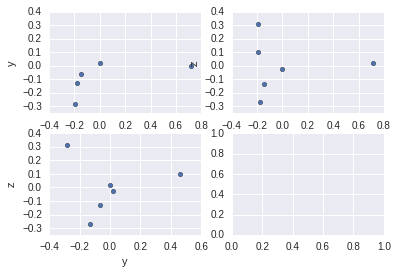

In [51]:
fig,ax = plt.subplots(2,2)
PCA_object2.plot('x', 'y', kind='scatter', ylim=(-.35,.4), ax=ax[0,0])
PCA_object2.plot('x', 'z', kind='scatter', ylim=(-.35,.4), ax=ax[0,1])
PCA_object2.plot('y', 'z', kind='scatter', ylim=(-.35,.4), ax=ax[1,0])

In [29]:
def euclid_dist(num):
    var1 = find_kmeans_centroids(num)
    var2 = []
    for i in range(num):
        for j in range (i+1, num):
            var2.append((i,j, np.sqrt(np.sum(var1[i,:]-var1[j,:])**2)))
    return var2

In [35]:
ans3 = euclid_dist(3)
ans4 = euclid_dist(4)
ans5 = euclid_dist(5)

In [38]:
ans6 = euclid_dist(6)

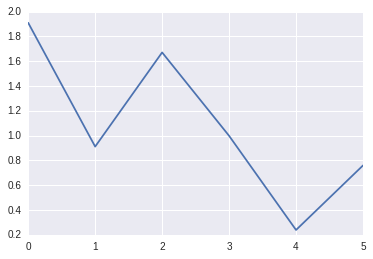

In [41]:
plt.plot(map(lambda x:x[2],ans4))